## Importação dos pacotes

In [1]:
# importar pacotes necessários
import numpy as np
import pandas as pd

In [2]:
# definir parâmetros extras
pd.set_option('precision', 4)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

## Carga dos dados

In [3]:
prefixo_arquivos = ''
#prefixo_arquivos = 'https://github.com/hjort/ai-labs/raw/master/kaggle/serpro-wine/'

In [4]:
# carregar arquivo de dados de treino
train_data = pd.read_csv(prefixo_arquivos + 'wine-train.csv', index_col='wine')
train_data.shape

(3265, 12)

In [5]:
# carregar arquivo de dados de teste
test_data = pd.read_csv(prefixo_arquivos + 'wine-test.csv', index_col='wine')
test_data.shape

(1633, 11)

In [6]:
# unir ambos os dados de treino e teste
data = pd.concat([train_data, test_data])
print(data.shape)

# mostrar alguns exemplos de registros
data.head()

(4898, 12)


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
wine,,,,,,,,,,,,
3472,10.5,0.045,0.36,0.9928,6.7,24.0,3.30,bad,2.0,0.59,131.0,0.16
3455,12.2,0.031,0.24,0.9893,7.3,29.0,2.90,bad,0.9,0.38,86.0,0.23
3322,12.5,0.039,0.30,0.9899,5.7,30.0,3.48,good,1.8,0.52,105.0,0.26
4896,12.8,0.022,0.30,0.9887,5.5,20.0,3.34,good,1.1,0.38,110.0,0.29
2123,9.0,0.076,0.27,0.9967,6.8,47.0,3.05,bad,10.7,0.38,154.0,0.25


## Transformações nos dados

In [7]:
# categorizar os valores dos sexos
data['quality'].fillna('unknown', inplace=True)
data['quality'] = data['quality'].map({'good': 1, 'bad': 0, 'unknown': -1}).astype(int)

In [8]:
data.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
wine,,,,,,,,,,,,
3472,10.5,0.045,0.36,0.9928,6.7,24.0,3.30,0,2.0,0.59,131.0,0.16
3455,12.2,0.031,0.24,0.9893,7.3,29.0,2.90,0,0.9,0.38,86.0,0.23
3322,12.5,0.039,0.30,0.9899,5.7,30.0,3.48,1,1.8,0.52,105.0,0.26
4896,12.8,0.022,0.30,0.9887,5.5,20.0,3.34,1,1.1,0.38,110.0,0.29
2123,9.0,0.076,0.27,0.9967,6.8,47.0,3.05,0,10.7,0.38,154.0,0.25


In [9]:
data.columns.values

array(['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'ph', 'quality', 'residual_sugar',
       'sulphates', 'total_sulfur_dioxide', 'volatile_acidity'],
      dtype=object)

In [10]:
# realizar normalização nos dados numéricos contínuos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler)

cols = ['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity', 'free_sulfur_dioxide',
        'ph', 'residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'volatile_acidity']

#for col in cols:
data.loc[:,cols] = scaler.fit_transform(data.loc[:,cols])

MinMaxScaler(copy=True, feature_range=(0, 1))


In [11]:
data.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
wine,,,,,,,,,,,,
3472,0.4032,0.1068,0.2169,0.1105,0.2788,0.0767,0.5273,0,0.0215,0.4302,0.2831,0.0784
3455,0.6774,0.0653,0.1446,0.0414,0.3365,0.0941,0.1636,0,0.0046,0.1860,0.1787,0.1471
3322,0.7258,0.0890,0.1807,0.0548,0.1827,0.0976,0.6909,1,0.0184,0.3488,0.2227,0.1765
4896,0.7742,0.0386,0.1807,0.0305,0.1635,0.0627,0.5636,1,0.0077,0.1860,0.2343,0.2059
2123,0.1613,0.1988,0.1627,0.1849,0.2885,0.1568,0.3000,0,0.1549,0.1860,0.3364,0.1667


## Modelagem preditiva

In [12]:
# importar os pacotes necessários para os algoritmos de classificação
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [13]:
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# avalia o desempenho do modelo, retornando o valor da precisão
def evaluate_classification_model(model, X, y):
    start = datetime.now()
    kfold = KFold(n_splits=10, random_state=42)
    results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=1)
    end = datetime.now()
    elapsed = int((end - start).total_seconds() * 1000)
    score = 100.0 * results.mean()
    stddev = 100.0 * results.std()
    print(model, '\nScore: %.2f (+/- %.2f) [%5s ms]' % (score, stddev, elapsed))
    return score, stddev, elapsed

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# faz o ajuste fino do modelo, calculando os melhores hiperparâmetros
def fine_tune_model(model, params, X, y):
    print('\nFine Tuning Model:')
    print(model, "\nparams:", params)
    kfold = KFold(n_splits=10, random_state=42)
    grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=kfold, verbose=1)
    grid.fit(X, y)
    print('\nGrid Best Score: %.2f' % (grid.best_score_ * 100.0))
    print('Best Params:', grid.best_params_)
    return grid

In [15]:
# definir dados de treino
train_data = data[data.quality >= 0]

# selecionar atributos para o modelo
cols = ['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity', 'free_sulfur_dioxide',
        'ph', 'residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'volatile_acidity']

X_train = train_data[cols]
y_train = train_data['quality']

print('Forma dos dados de treino:', X_train.shape, y_train.shape)

Forma dos dados de treino: (3265, 11) (3265,)


In [16]:
train_data.corr()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
alcohol,1.0000,-0.3581,-0.0808,-0.7774,-0.1191,-0.2621,0.1185,0.3935,-0.4650,-0.0085,-0.4566,0.0664
chlorides,-0.3581,1.0000,0.1128,0.2525,0.0142,0.1097,-0.0942,-0.1902,0.0897,0.0124,0.2036,0.0714
citric_acid,-0.0808,0.1128,1.0000,0.1575,0.2772,0.1033,-0.1517,-0.0366,0.1040,0.0710,0.1388,-0.1391
density,-0.7774,0.2525,0.1575,1.0000,0.2649,0.3196,-0.0875,-0.2851,0.8480,0.0717,0.5420,0.0359
fixed_acidity,-0.1191,0.0142,0.2772,0.2649,1.0000,-0.0358,-0.4209,-0.0804,0.0994,-0.0127,0.1106,-0.0087
free_sulfur_dioxide,-0.2621,0.1097,0.1033,0.3196,-0.0358,1.0000,0.0078,-0.0372,0.3302,0.0530,0.6324,-0.0936
ph,0.1185,-0.0942,-0.1517,-0.0875,-0.4209,0.0078,1.0000,0.0992,-0.1847,0.1396,0.0069,-0.0388
quality,0.3935,-0.1902,-0.0366,-0.2851,-0.0804,-0.0372,0.0992,1.0000,-0.1219,0.0229,-0.1669,-0.0670
residual_sugar,-0.4650,0.0897,0.1040,0.8480,0.0994,0.3302,-0.1847,-0.1219,1.0000,-0.0151,0.4217,0.0672
sulphates,-0.0085,0.0124,0.0710,0.0717,-0.0127,0.0530,0.1396,0.0229,-0.0151,1.0000,0.1217,-0.0258


In [17]:
# definir dados de teste
test_data = data[data.quality < 0]

X_test = test_data[cols]

print('Forma dos dados de teste:', X_test.shape)

Forma dos dados de teste: (1633, 11)


In [18]:
names = []
models = []
scores = []
stddevs = []
times = []

def add_model_info(name, model, score, stddev, elapsed):
    names.append(name)
    models.append((name, model))
    scores.append(score)
    stddevs.append(stddev)
    times.append(elapsed)

## Avaliação e ajuste fino de cada modelo preditivo

-  https://scikit-learn.org/stable/modules/classes.html

### Generalized Linear Models

In [19]:
model = LogisticRegression(random_state=42, solver='newton-cg', C=0.1, multi_class='auto', max_iter=500)

params = dict(
    solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    C=np.logspace(-3, 3, 7)
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('LR', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) 
Score: 78.65 (+/- 2.22) [ 2314 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished


### Decision Trees

In [20]:
model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=6, min_samples_split=0.25)

#criterion=’mse’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
#min_impurity_decrease=0.0, min_impurity_split=None, presort=False

params = dict(
    criterion=['gini','entropy'],
    max_depth=[4, 6, 8, 10, 12, 14],
    min_samples_split=[0.25, 0.5, 0.75, 1.0]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('DT', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 
Score: 79.11 (+/- 1.92) [  834 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


### Discriminant Analysis

In [21]:
model = LinearDiscriminantAnalysis(solver='lsqr')

#solver=’svd’, shrinkage=None, priors=None,
#n_components=None, store_covariance=False, tol=0.0001

params = dict(
    solver=['svd', 'lsqr'] #, 'eigen']
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('LDA', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001) 
Score: 80.09 (+/- 1.44) [  890 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


### Naïve Bayes

In [22]:
model = GaussianNB(priors=None, var_smoothing=1e-8)

#priors=None, var_smoothing=1e-09

params = dict(
    priors=[None],
    var_smoothing=[1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('NB', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianNB(priors=None, var_smoothing=1e-08) 
Score: 72.59 (+/- 1.96) [  446 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


### Nearest Neighbors

In [23]:
model = KNeighborsClassifier(n_neighbors=11, weights='uniform')

#n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’,
#metric_params=None, n_jobs=None

params = dict(
    n_neighbors=[1, 3, 5, 7, 9, 11, 13],
    weights=['uniform', 'distance']
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('KNN', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform') 
Score: 81.20 (+/- 1.83) [ 2323 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished


### Support Vector Machines

In [24]:
model = SVC(random_state=42, C=10, gamma=0.1, kernel='rbf')

#kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001, C=1.0, 
#epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1

params = dict(
    C=[0.001, 0.01, 0.1, 1, 10, 100],
    gamma=[0.001, 0.01, 0.1, 1, 10, 100],
    kernel=['linear', 'rbf']
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('SVM', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 
Score: 78.25 (+/- 2.17) [20388 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.4s finished


### Neural network models

In [25]:
model = MLPClassifier(random_state=42, solver='lbfgs', alpha=1, hidden_layer_sizes=(100,), activation='logistic')
                
#hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, 
#learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
#random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
#early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10

params = dict(
    alpha=[1,0.1,0.01,0.001,0.0001,0],
    hidden_layer_sizes=[(100,), (50,), (50,2), (5,5,2), (10,5,2)],
    activation=['identity', 'logistic', 'tanh', 'relu'],
    solver=['lbfgs', 'sgd', 'adam']
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('MLP', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False) 
Score: 80.03 (+/- 1.67) [116053 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished


### Ensemble Methods

In [26]:
model = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42, n_estimators=50)

#base_estimator=None, n_estimators=50, learning_rate=1.0,
#algorithm=’SAMME.R’, random_state=None

params = dict(
    n_estimators=[10, 25, 50, 100]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('ABDT', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=42,
                            

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished


In [27]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=42, n_estimators=100,
                          max_samples=0.25, max_features=0.8)

#base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0,
#bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
#n_jobs=None, random_state=None, verbose=0

params = dict(
    n_estimators=[10, 50, 100, 500],
    max_samples=[0.25, 0.5, 0.75, 1.0],
    max_features=[0.7, 0.8, 0.9, 1.0]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('BC', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.8, max_samples=0.25, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False) 
Score: 84.29 (+/- 1.57) [33024 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   33.0s finished


In [28]:
model = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=7, 
                             min_samples_split=0.25, max_features='auto')

#n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2,
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
#max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0,
#warm_start=False, class_weight=None

params = dict(
    n_estimators=[10, 50, 100, 500],
    max_depth=[None, 3, 7, 11],
    min_samples_split=[0.25, 0.5],
    max_features=['auto', 0.7, 0.85, 1.0]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('ET', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=7, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=0.25,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False) 
Score: 78.22 (+/- 2.16) [13497 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   13.5s finished


In [29]:
model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_features=0.75,
                                   max_depth=4, learning_rate=0.1, subsample=0.6)

#loss=’ls’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2,
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
#min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, 
#max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, 
#tol=0.0001

params = dict(
    n_estimators=[100, 250, 500],
    max_features=[0.75, 0.85, 1.0],
    max_depth=[4, 6, 8, 10],
    learning_rate=[0.05, 0.1, 0.15],
    subsample=[0.4, 0.6, 0.8]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('GB', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=0.75, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 
Score: 83.58 (+/- 1.86) [26575 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   26.6s finished


In [30]:
model = RandomForestClassifier(random_state=42, n_estimators=100, max_features='auto', max_depth=5)

#n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
#verbose=0, warm_start=False

params = dict(
    n_estimators=[10, 50, 100, 500],
    max_features=['auto', 'sqrt', 'log2'],
    max_depth=[None, 3, 5, 7, 9, 11, 13]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('RF', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 
Score: 81.62 (+/- 1.51) [25028 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.0s finished


### Outros algoritmos

#### XGBoost

- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [31]:
model = XGBClassifier(max_depth=3, n_estimators=100)

#max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror',
#booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
#colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
#base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

params = dict(
    max_depth=[3, 5, 7, 9],
    n_estimators=[50, 75, 100, 200]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('XGB', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 
Score: 82.57 (+/- 1.80) [15027 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.0s finished


#### LightGBM

- https://github.com/microsoft/LightGBM
- https://lightgbm.readthedocs.io/en/latest/
- https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

### Ensemble Learning Model

- https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e
- https://github.com/vecxoz/vecstack

In [32]:
estimators =  [
    ('RF', RandomForestClassifier(random_state=42, n_estimators=100, max_features='auto', max_depth=5)),
    ('BC', BaggingClassifier(random_state=42, n_estimators=100, max_samples=0.25, max_features=0.8)),
    ('GB', GradientBoostingClassifier(random_state=42, max_depth=4, max_features=0.75,
                                   n_estimators=100, learning_rate=0.1, subsample=0.6)),
#    ('XGB', XGBClassifier(max_depth=3, n_estimators=100)),
]
model = VotingClassifier(estimators, n_jobs=-1, weights=(2,1,1))

#estimators, weights=None, n_jobs=None

params = dict(
    weights=[(1,1,1), (2,1,1), (3,1,1), (3,2,1), (2,2,1), (2,1,2), (5,4,3), (1,2,1), (1,1,2), ]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('VC', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
             

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


## Avaliar importância dos atributos no modelo

In [33]:
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=100)
model.fit(X_train, y_train)

importances = pd.DataFrame({'feature': X_train.columns,
                            'importance': np.round(model.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(20)

,importance
feature,
alcohol,0.150
density,0.134
residual_sugar,0.090
chlorides,0.089
ph,0.088
volatile_acidity,0.083
free_sulfur_dioxide,0.080
total_sulfur_dioxide,0.079
sulphates,0.072


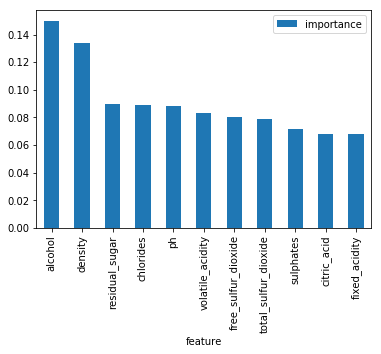

In [39]:
importances.plot.bar()

## Comparação final entre os algoritmos

In [35]:
results = pd.DataFrame({'Algorithm': names, 'Score': scores, 'Std Dev': stddevs, 'Time (ms)': times})
results.sort_values(by='Score', ascending=False)

,Algorithm,Score,Std Dev,Time (ms)
8,BC,84.2870,1.5661,33024
10,GB,83.5829,1.8555,26575
12,XGB,82.5723,1.8022,15027
13,VC,81.8688,1.5363,89509
11,RF,81.6238,1.5070,25028
4,KNN,81.1950,1.8325,2323
7,ABDT,80.9483,2.3943,2037
2,LDA,80.0910,1.4418,890
6,MLP,80.0298,1.6675,116053
1,DT,79.1120,1.9210,834


## Gerar arquivos com resultados

In [36]:
# criar diretório para os arquivos de envio
!test -d submissions || mkdir submissions

In [37]:
prefixo_arquivo = 'submissions/wine-submission'
sufixo_arquivo = '18ago'

for name, model in models:
    print(model, '\n')
    
    # treinar o modelo
    model.fit(X_train, y_train)
    
    # executar previsão usando o modelo
    y_pred = model.predict(X_test)
    vfunc = np.vectorize(lambda x: 'good' if x > 0 else 'bad')

    # gerar dados de envio (submissão)
    submission = pd.DataFrame({
      'wine': X_test.index,
      'quality': vfunc(y_pred)
    })
    submission.set_index('wine', inplace=True)

    # gerar arquivo CSV para o envio
    filename = '%s-p-%s-%s.csv' % (prefixo_arquivo, sufixo_arquivo, name.lower())
    submission.to_csv(filename)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001) 

GaussianNB(priors=None, var_smoothing=1e-08) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric=

In [38]:
!head submissions/*.csv

==> submissions/wine-submission-p-18ago-abdt.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-bc.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-dt.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-et.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-gb.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-knn.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-lda.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==